Fashion Training Dataset Consist of 70,000 images divided into 60,000 training and 10,000 testing sample.Dataset Sample consist of 28 * 28 grayscale images associated with a label from 10 classes. 

The Top 10 classes are as followss :
0 -> T-shirt/ Top, 1-> Trouser, 2->Pullover, 3-> Dress, 4-> coat, 5-> Sandal, 6-> Shrit 7-> Sneaker, 8-> Bag, 9-> Ankel Boot




In [2]:
%pip install -U pip
%pip install "keras>=3" torch

Note: you may need to restart the kernel to use updated packages.
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
Using cached keras-3.11.3-py3-none-any.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 12.1 MB/s  0:00:06 eta 0:00:01
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:━━━━━━━━━━━━━━━━━━ 0/3 [sympy]
      Successfully uninstalled sympy-1.13.2━━━━━ 0/3 [sympy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [keras]32m2/3 [keras]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch"  # set BEFORE importing keras

import keras
from keras import layers, models

print("Keras:", keras.__version__, "Backend:", os.environ["KERAS_BACKEND"])


Keras: 3.11.3 Backend: torch


## Step 1: Import Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep =',')

In [6]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep =',')

## Visualization of Data

In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [13]:
training = np.array(fashion_train_df, dtype = 'float32' )

In [14]:
testing = np.array(fashion_test_df, dtype = 'float32' )

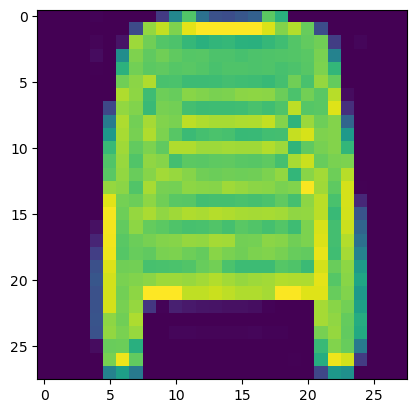

In [15]:
import random 
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]

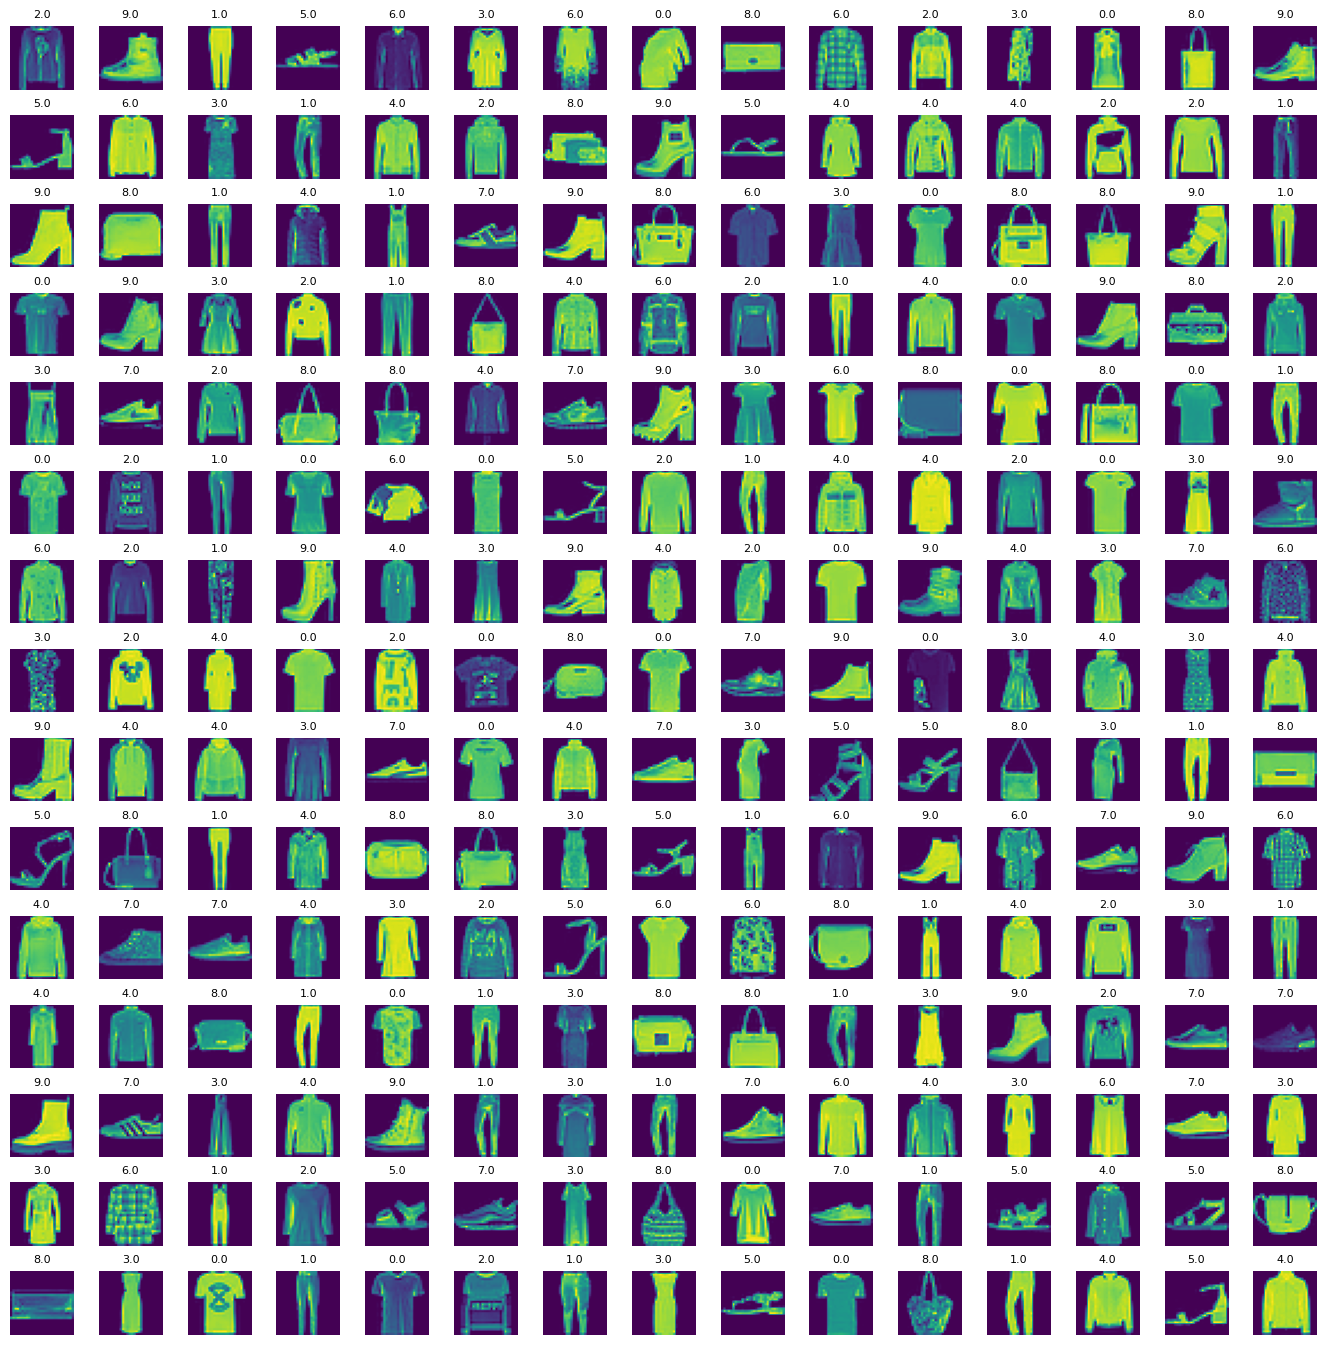

In [16]:
## Let vuew more images in grid format
## Define the Dimensions of the plot Grid

W_grid = 15
L_grid = 15

## Subplot return the figure object and axes object
## We can use the axes object to plot the specific figures st various locations.

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()  ## Flatten into 15 * 15 matrix into 225 array

n_training = len(training)  ## get the length of the training dataset

## Select the random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    ## read and display images with selected indexes
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)


## Training the Model

In [17]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [18]:
x_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

In [21]:
x_train = x_train.reshape(x_train.shape[0], * (28,28,1))
x_test = x_test.reshape(x_test.shape[0], * (28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], * (28,28,1))

In [22]:
x_train.shape

(48000, 28, 28, 1)

In [23]:
x_test.shape

(10000, 28, 28, 1)

In [24]:
x_validate.shape

(12000, 28, 28, 1)

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
cnn_model = Sequential()

In [30]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28,28,1), activation = 'relu'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
cnn_model.add(MaxPooling2D(pool_size =(2,2)))

In [31]:
cnn_model.add(Flatten())

In [33]:
cnn_model.add(Dense(32, activation = 'relu'))

In [35]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [39]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [40]:
epochs = 50

In [46]:
cnn_model.fit(x_train,
              y_train,
              batch_size = 512,
              epochs = epochs,
              verbose = 1,
              validation_data = (x_validate, y_validate))
    


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2313 - loss: 1.9086 - val_accuracy: 0.1788 - val_loss: 1.4940
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4902 - loss: 1.1611 - val_accuracy: 0.7229 - val_loss: 0.7962
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7415 - loss: 0.7334 - val_accuracy: 0.7545 - val_loss: 0.6908
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7639 - loss: 0.6628 - val_accuracy: 0.7705 - val_loss: 0.6442
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7736 - loss: 0.6295 - val_accuracy: 0.7771 - val_loss: 0.6197
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7823 - loss: 0.6076 - val_accuracy: 0.7782 - val_loss: 0.6041
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7890 - loss: 0.5887 - val_accuracy: 0.7824 - val_loss: 0.5981
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7875 - loss: 0.5815 - val_accuracy: 0.7887 - val_loss

## Evaluating Model

In [52]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8375 - loss: 0.4408
Test Accuracy: 0.837


In [57]:
predicated_classes = cnn_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [58]:
predicated_classes


array([[2.3729154e-03, 7.9206771e-12, 1.0067217e-06, ..., 6.1088101e-12,
        1.3368370e-05, 8.7772420e-09],
       [6.4260796e-08, 7.9071568e-03, 1.2644031e-07, ..., 1.6257097e-08,
        6.8998524e-10, 1.5167586e-09],
       [2.7677204e-04, 5.9749419e-07, 8.0903582e-03, ..., 2.2800348e-10,
        1.0141948e-06, 1.0602595e-07],
       ...,
       [5.1416451e-11, 2.0753609e-11, 2.0185355e-10, ..., 3.6034786e-09,
        1.7451837e-04, 8.5822232e-14],
       [4.2522791e-07, 1.7501292e-13, 1.5918384e-07, ..., 2.3645384e-14,
        5.4180323e-06, 1.9676236e-11],
       [6.1081110e-08, 2.4289216e-07, 6.2955733e-06, ..., 4.7364991e-14,
        2.4444846e-09, 2.2235748e-11]], dtype=float32)

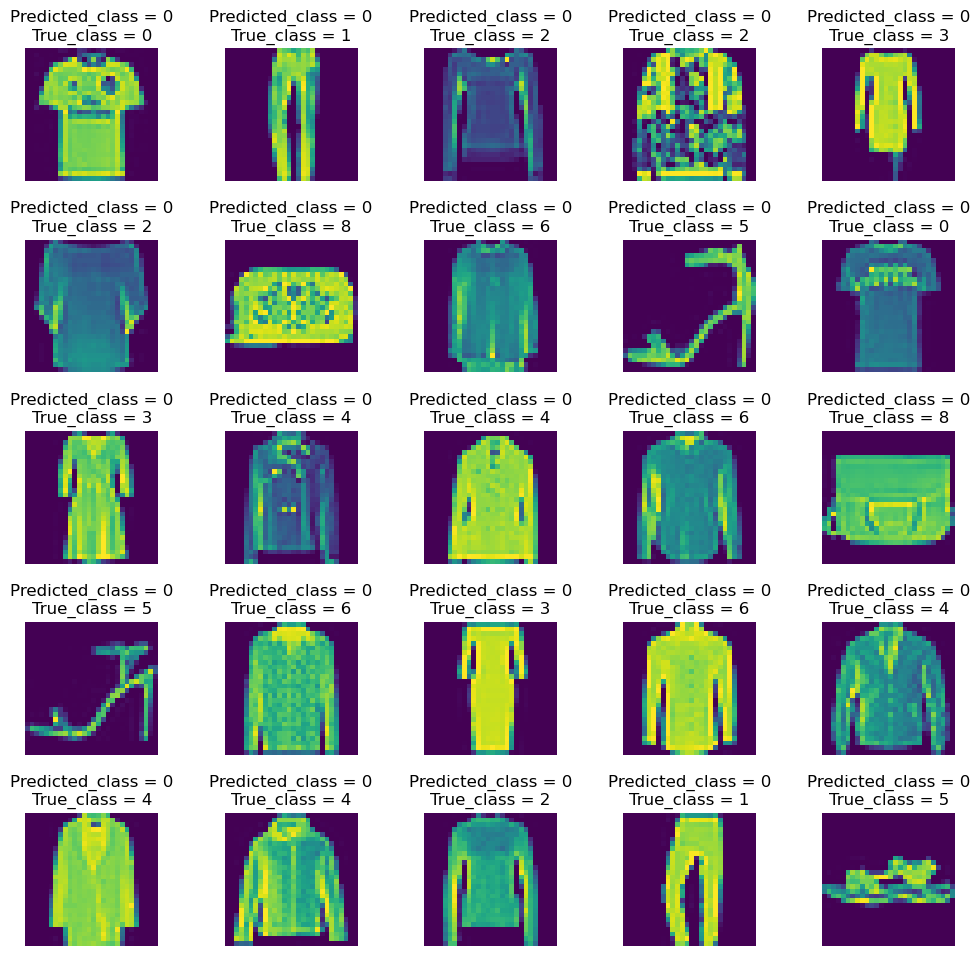

In [69]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Predicted_class = {}\nTrue_class = {}".format(int(np.asarray(predicated_classes).ravel()[i]), int(y_test[i]) if y_test.ndim == 1 else int(np.argmax(y_test[i]))))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

<Axes: >

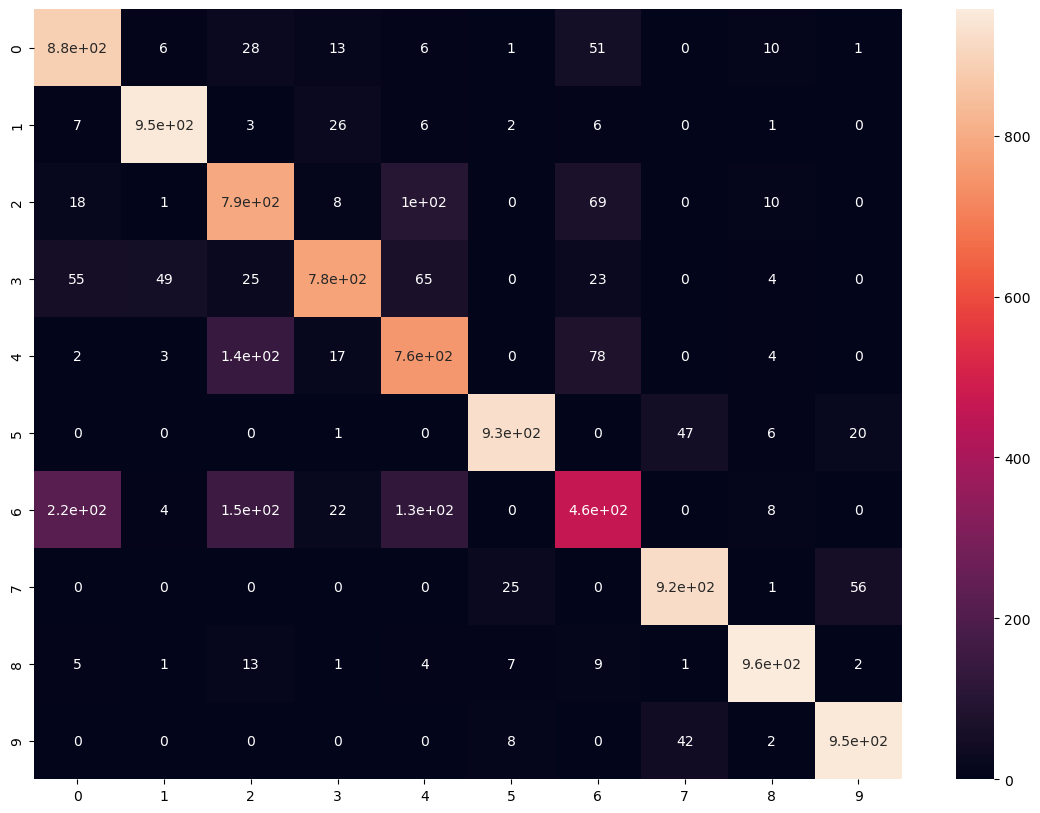

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1) if y_test.ndim > 1 else y_test,
                      (np.asarray(predicated_classes).argmax(axis=1) if np.asarray(predicated_classes).ndim > 1 else np.asarray(predicated_classes).ravel().astype(int)))

plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [80]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test.argmax(axis=1) if y_test.ndim > 1 else y_test,
                            (np.asarray(predicated_classes).argmax(axis=1) if np.asarray(predicated_classes).ndim > 1 else np.asarray(predicated_classes).ravel().astype(int)),
                            target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.74      0.88      0.81      1000
     Class 1       0.94      0.95      0.94      1000
     Class 2       0.69      0.79      0.74      1000
     Class 3       0.90      0.78      0.83      1000
     Class 4       0.71      0.76      0.73      1000
     Class 5       0.96      0.93      0.94      1000
     Class 6       0.66      0.47      0.55      1000
     Class 7       0.91      0.92      0.91      1000
     Class 8       0.95      0.96      0.96      1000
     Class 9       0.92      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000

